In [1]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dogs.csv')
features = df.columns[1:]
x_orig = df[features]
y = df['breed']

scaler = prep.StandardScaler().fit(x_orig)
x = pd.DataFrame(scaler.transform(x_orig))
x.columns = features

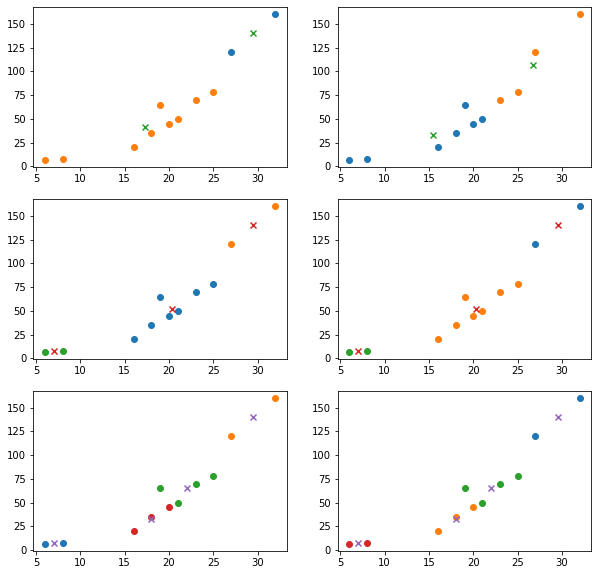

In [4]:
#kmeans params
inits = ['k-means++', 'random']
fig = plt.figure(figsize = (10,10))
plt_ind =1
for i in range(2,5):
    for init in inits:
        
        est = KMeans(n_clusters = i, init = init)
        est.fit(x)
        
        df['labels'] = est.labels_
        
        fig.add_subplot(3, 2, plt_ind)
        
        for j in range(0,i):
            clusters = df.loc[lambda x: x['labels']==j, :]
            plt.scatter(clusters['height'], clusters['weight'])
        
        centers = pd.DataFrame(scaler.inverse_transform(est.cluster_centers_), columns = features)
        plt.scatter(centers['height'], centers['weight'], marker = 'x')
        plt_ind = plt_ind +1